In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Data


In [2]:
train = pd.read_csv('../data/train.csv')
print(f'train shape: {train.shape}')
print(train.head())
test = pd.read_csv('../data/test.csv')
print(f'test shape: {test.shape}')
print(test.head())

train shape: (1780, 2)
                               title  label
0  Sun offers processing by the hour      0
1        Wilkinson return 'unlikely'      1
2    Parmalat bank barred from suing      0
3     2D Metal Slug offers retro fun      0
4    China 'blocks Google news site'      0
test shape: (445, 2)
                               title  label
0    Kilroy launches 'Veritas' party      1
1    Blunkett hints at election call      0
2  Premier League planning Cole date      1
3     Bristol City 2-1 Milton Keynes      0
4   China keeps tight rein on credit      1


<Axes: title={'center': 'Training label distribution'}, xlabel='label'>

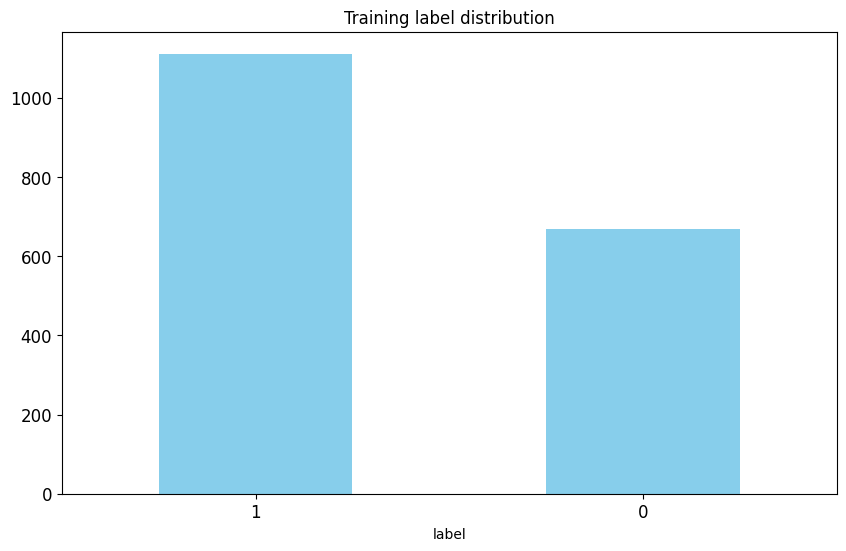

In [12]:
train['label'].value_counts().plot(kind='bar', title='Training label distribution', figsize=(10, 6), color='skyblue', rot=0, fontsize=12)

# Random Forest (RF) trainning


In [4]:
# Train rf classifier
vectorizer = TfidfVectorizer()
classifier = RandomForestClassifier()
model = make_pipeline(vectorizer, classifier)
model.fit(train['title'], train['label'])
labels = model.predict(test['title'])

### Performance


In [5]:
# Evaluate the model
print(classification_report(test['label'], labels))

              precision    recall  f1-score   support

           0       0.38      0.23      0.29       167
           1       0.63      0.77      0.69       278

    accuracy                           0.57       445
   macro avg       0.50      0.50      0.49       445
weighted avg       0.54      0.57      0.54       445



In [6]:
import pickle
with open('../model/rf_model.pkl', 'wb') as f:
    pickle.dump(model, f)